In [1]:
!pip install gql

In [2]:
get_ipython().system(' pip install yelp')

In [26]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import sin, cos, sqrt, atan2, radians
from pprint import pprint
from yelp.client import Client
from yelp_api_key import yelp_client_id
from yelp_api_key import yelp_api_key
from urllib.parse import quote



%matplotlib notebook

from pandas.io.json import json_normalize

API_KEY = yelp_api_key
API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'  # Business ID will come after slash.

DEFAULT_TERM = "restaurant"
DEFAULT_LOCATION = "1734 E 41 St. Los Angeles, CA"
DEFAULY_DISTANCE = 5
SEARCH_LIMIT = 50

def request(host, path, api_key, url_params=None):
    
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }
    print(u'Querying {0} ...'.format(url))
    response = requests.request('GET', url, headers=headers, params=url_params)
    return response.json()

response = request(host=API_HOST,
                  path=SEARCH_PATH,
                  api_key=API_KEY,
                  url_params={"location":DEFAULT_LOCATION, "term":DEFAULT_TERM, "limit": SEARCH_LIMIT})

pprint(response, indent = 4)

# df = pd.DataFrame.from_dict(json_normalize(response), orient='columns')

# df.head()   

Querying https://api.yelp.com/v3/businesses/search ...
{   'businesses': [   {   'alias': 'rays-bbq-huntington-park-4',
                          'categories': [   {   'alias': 'bbq',
                                                'title': 'Barbeque'},
                                            {   'alias': 'smokehouse',
                                                'title': 'Smokehouse'},
                                            {   'alias': 'salad',
                                                'title': 'Salad'}],
                          'coordinates': {   'latitude': 33.986598,
                                             'longitude': -118.229803},
                          'display_phone': '',
                          'distance': 2590.6126917737843,
                          'id': 'spKUIFIABLaU63Ex4PEYvQ',
                          'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/Ql23pKC6iTbf0ngKjYif7g/o.jpg',
                          'is_closed': False,
         

                          'categories': [   {   'alias': 'french',
                                                'title': 'French'},
                                            {   'alias': 'breakfast_brunch',
                                                'title': 'Breakfast & Brunch'},
                                            {   'alias': 'sandwiches',
                                                'title': 'Sandwiches'}],
                          'coordinates': {   'latitude': 33.98179,
                                             'longitude': -118.21985},
                          'display_phone': '(323) 484-9803',
                          'distance': 3506.164432601435,
                          'id': 'g1qqGhzvCzxek2l0DewpPQ',
                          'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/2IvxqyJT4_63i5xHZSxFpQ/o.jpg',
                          'is_closed': False,
                          'location': {   'address1': '2805 E Gage Ave',
                    

                          'distance': 3842.044561233855,
                          'id': 'wo3wnj3pMSOPkzqpvbey-g',
                          'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/JSNYcv2ynSbngJ0tM4xU9w/o.jpg',
                          'is_closed': False,
                          'location': {   'address1': '500 Mateo St',
                                          'address2': None,
                                          'address3': None,
                                          'city': 'Los Angeles',
                                          'country': 'US',
                                          'display_address': [   '500 Mateo St',
                                                                 'Los Angeles, '
                                                                 'CA 90013'],
                                          'state': 'CA',
                                          'zip_code': '90013'},
                          'name': 'Bavel',
          

In [27]:
lat = []
lon = []
business_name =[]
price = []
category = []
transactions = []
rating = []
review_count = []

for i in range(50):
    try:
        lat.append(response["businesses"][i]["coordinates"]["latitude"])
        lon.append(response["businesses"][i]["coordinates"]["longitude"])
        business_name.append(response['businesses'][i]['name'])
        category.append(response['businesses'][i]['categories'][0]['title'])
        transactions.append(response['businesses'][i]['transactions'])
        rating.append(response['businesses'][i]['rating'])
        review_count.append(response['businesses'][i]['review_count'])
        price.append(response['businesses'][i]['price'])
    except:
        price.append("NaN")
        pass
    continue
    
   
print(f"{len(lat)}")
print(f"{len(lon)}")
print(f"{len(business_name)}") 
print(f"{len(price)}") 
print(f"{len(category)}")
print(f"{len(transactions)}")
print(f"{len(rating)}")
print(f"{len(review_count)}")

50
50
50
50
50
50
50
50


In [28]:
print(json.dumps(response, indent = 4, sort_keys = True))

{
    "businesses": [
        {
            "alias": "rays-bbq-huntington-park-4",
            "categories": [
                {
                    "alias": "bbq",
                    "title": "Barbeque"
                },
                {
                    "alias": "smokehouse",
                    "title": "Smokehouse"
                },
                {
                    "alias": "salad",
                    "title": "Salad"
                }
            ],
            "coordinates": {
                "latitude": 33.986598,
                "longitude": -118.229803
            },
            "display_phone": "",
            "distance": 2590.6126917737843,
            "id": "spKUIFIABLaU63Ex4PEYvQ",
            "image_url": "https://s3-media3.fl.yelpcdn.com/bphoto/Ql23pKC6iTbf0ngKjYif7g/o.jpg",
            "is_closed": false,
            "location": {
                "address1": "6038 Santa Fe Ave",
                "address2": "",
                "address3": "",
               

In [29]:
total_data = {"Latitude": lat, 
             "Longitude": lon, 
             "Restaurant Name": business_name, 
             "Category": category, 
             "Transactions": transactions, 
             "Rating": rating, 
             "Price Tag":price,
             "Review": review_count,
             }

total_data_df_rename = pd.DataFrame(total_data)
total_data_df_rename_sorted = total_data_df_rename.sort_values(by=["Review"], ascending=True).reset_index(drop=True)

total_data_df_rename_sorted

,Latitude,Longitude,Restaurant Name,Category,Transactions,Rating,Price Tag,Review
0,34.033901,-118.241499,Burmese Please,Burmese,[],5.0,NaN,1
1,34.018393,-118.167048,Street Kabbob Eastla,Mediterranean,[],5.0,NaN,1
2,34.041910,-118.255160,9th St Ramen,Ramen,[],5.0,NaN,2
3,33.959986,-118.246576,Ying Hana Teriyaki,Japanese,[],5.0,NaN,3
4,34.035015,-118.234305,The Ricans Food,Puerto Rican,"[pickup, delivery]",5.0,NaN,3
5,34.026254,-118.284009,Patel's Kitchen,Food Trucks,[],5.0,NaN,3
6,34.014241,-118.220062,Beyond Vegan,Food Delivery Services,"[pickup, delivery]",5.0,NaN,4
7,34.012900,-118.256170,Los Amigos Restaurant Salvadoreno,Salvadoran,[],4.5,$,4
8,34.022510,-118.260340,SamSik E,Korean,[],5.0,NaN,6
9,34.033741,-118.241462,Mano Po,Filipino,[],5.0,NaN,7


In [42]:
total_data_df_rename_sorted.to_csv("Restaurant_DataFrame.csv", sep = ",")

In [30]:
#approximate radius of earth in miles
r = 3958.8

food_bank_lat = radians(34.007839)
food_bank_lon = radians(-118.241728)

lat1 = radians(34.002441)
lon1 = radians(-118.240555)


distance_lat = food_bank_lat - lat1
distance_lon = food_bank_lon - lon1

a = sin(distance_lat / 2)**2 + cos(lat1) * cos(food_bank_lat) * sin(distance_lon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance = r * c

print(f"The distance is:{round(distance,4)} mi")

The distance is:0.379 mi


In [31]:
r = 3958.8

food_bank_lat = radians(34.007839)
food_bank_lon = radians(-118.241728)

distance_in_mi = []

for i in range(50):
    distance_lat = (food_bank_lat) - (radians(total_data_df_rename_sorted["Latitude"][i]))
    distance_lon = (food_bank_lon) - (radians(total_data_df_rename_sorted["Longitude"][i]))
    
    a = sin(distance_lat / 2)**2 + cos(radians(total_data_df_rename_sorted["Latitude"][i])) * cos(food_bank_lat) * sin(distance_lon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    distance = r*c
    
    distance_mi = f"{round(distance, 3)}mi"
    distance_in_mi.append(distance_mi)
    
print(distance_in_mi)


['1.801mi', '4.339mi', '2.477mi', '3.318mi', '1.925mi', '2.735mi', '1.317mi', '0.898mi', '1.471mi', '1.79mi', '0.379mi', '1.962mi', '1.425mi', '1.992mi', '3.848mi', '0.483mi', '2.697mi', '0.858mi', '4.98mi', '0.476mi', '1.274mi', '2.74mi', '1.251mi', '1.917mi', '2.138mi', '0.861mi', '0.444mi', '1.362mi', '1.488mi', '0.776mi', '2.919mi', '1.317mi', '2.806mi', '1.607mi', '1.356mi', '2.193mi', '2.61mi', '3.0mi', '2.126mi', '1.619mi', '2.941mi', '2.349mi', '2.384mi', '2.844mi', '2.382mi', '3.261mi', '1.946mi', '3.711mi', '2.895mi', '2.629mi']


In [32]:
distance_df = pd.DataFrame({"Restaurant Name": business_name, 
                            "Distance to Food Bank(mi)": distance_in_mi, 
                            "Review Count":review_count,
                            "Price Tag": price
                           })
distance_df_sorted = distance_df.sort_values(by=["Distance to Food Bank(mi)"], ascending=True).reset_index(drop=True)
distance_df_sorted

,Restaurant Name,Distance to Food Bank(mi),Review Count,Price Tag
0,JOEY DTLA,0.379mi,773,NaN
1,Nina’s Cafe Bar,0.444mi,29,$$
2,Nina's Cafe,0.476mi,485,$$
3,Ying Hana Teriyaki,0.483mi,3,NaN
4,Wurstküche,0.776mi,8277,$$
5,Z's Place,0.858mi,89,$$
6,Tire Shop Taqueria,0.861mi,451,$
7,Little Trattoria 25,0.898mi,176,$$
8,Granny's Kitchen,1.251mi,327,$$
9,Bestia,1.274mi,6077,$$$


In [43]:
distance_df_sorted.to_csv("Restaurant_Distance.csv", sep = ",")

<IPython.core.display.Javascript object>


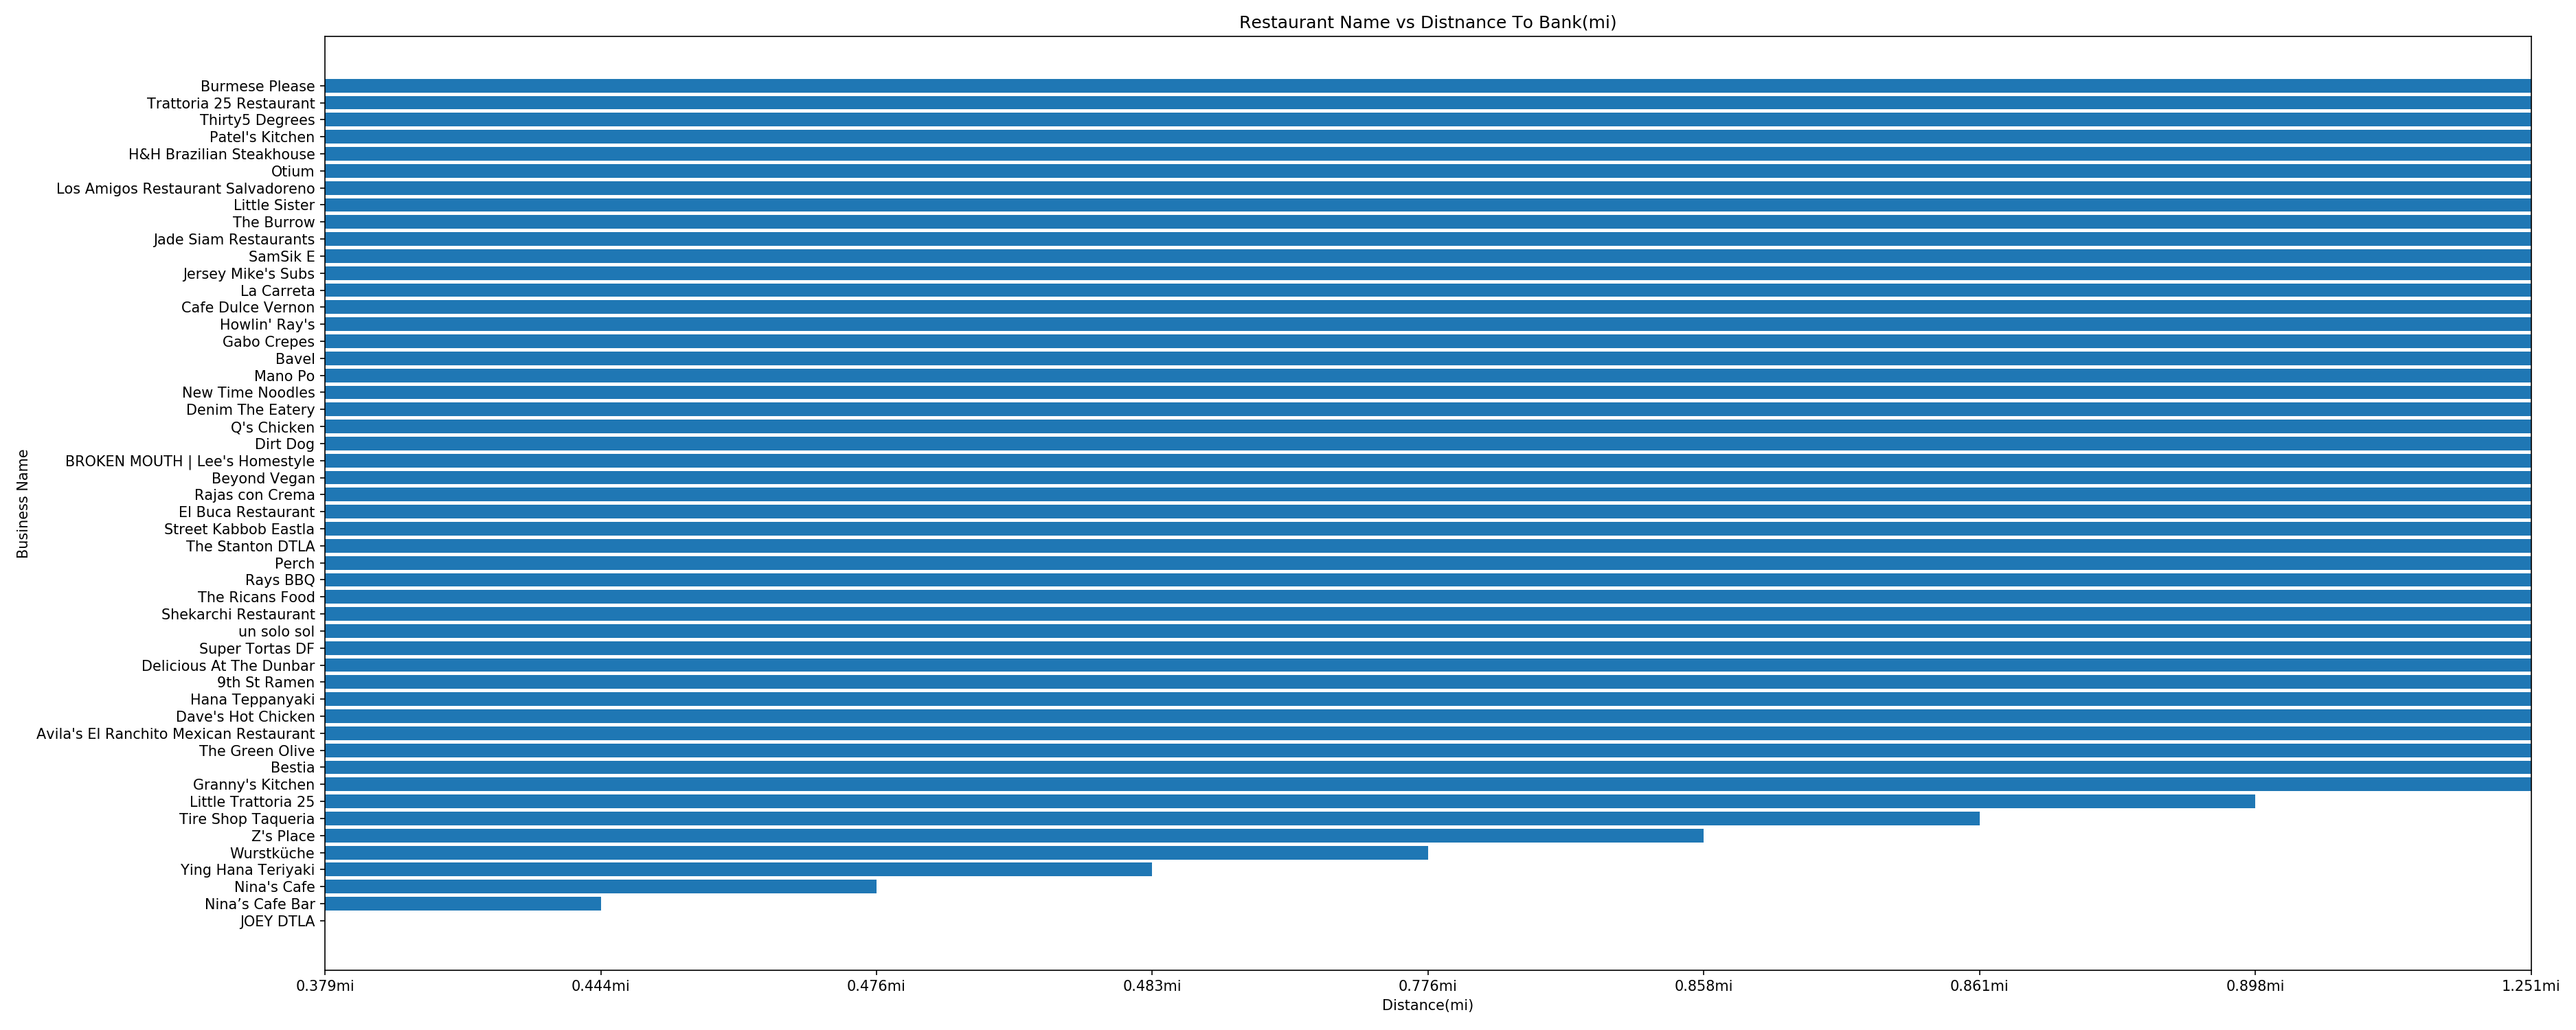

In [33]:
fig, ax4 = plt.subplots(figsize=(25, 10))

distance_plot_4 = distance_df_sorted["Distance to Food Bank(mi)"]
business_name_plot_4 = distance_df_sorted["Restaurant Name"]

ax4.barh(business_name_plot_4, distance_plot_4)

ax4.set_title("Restaurant Name vs Distnance To Bank(mi)")
ax4.set_xlabel("Distance(mi)")
ax4.set_ylabel("Business Name")

# ax4.xaxis.set_tick_params(rotation=90)

ax4.set_xlim(0,8)

fig.tight_layout()

fig.savefig("../Project 1/Plot_4.png")

In [34]:
total_data_df_rename_sorted.describe()

,Latitude,Longitude,Rating,Review
count,50.000000,50.000000,50.000000,50.000000
mean,34.018870,-118.241393,4.510000,864.160000
std,0.025617,0.023100,0.410202,1920.223683
min,33.959986,-118.299640,3.500000,1.000000
25%,34.000730,-118.256564,4.000000,23.000000
50%,34.016475,-118.241008,4.500000,140.500000
75%,34.041810,-118.226533,5.000000,597.250000
max,34.061610,-118.167048,5.000000,8277.000000


In [36]:
distance_df_sorted["Distance to Food Bank(mi)"].describe()

count          50
unique         49
top       1.317mi
freq            2
Name: Distance to Food Bank(mi), dtype: object

<IPython.core.display.Javascript object>


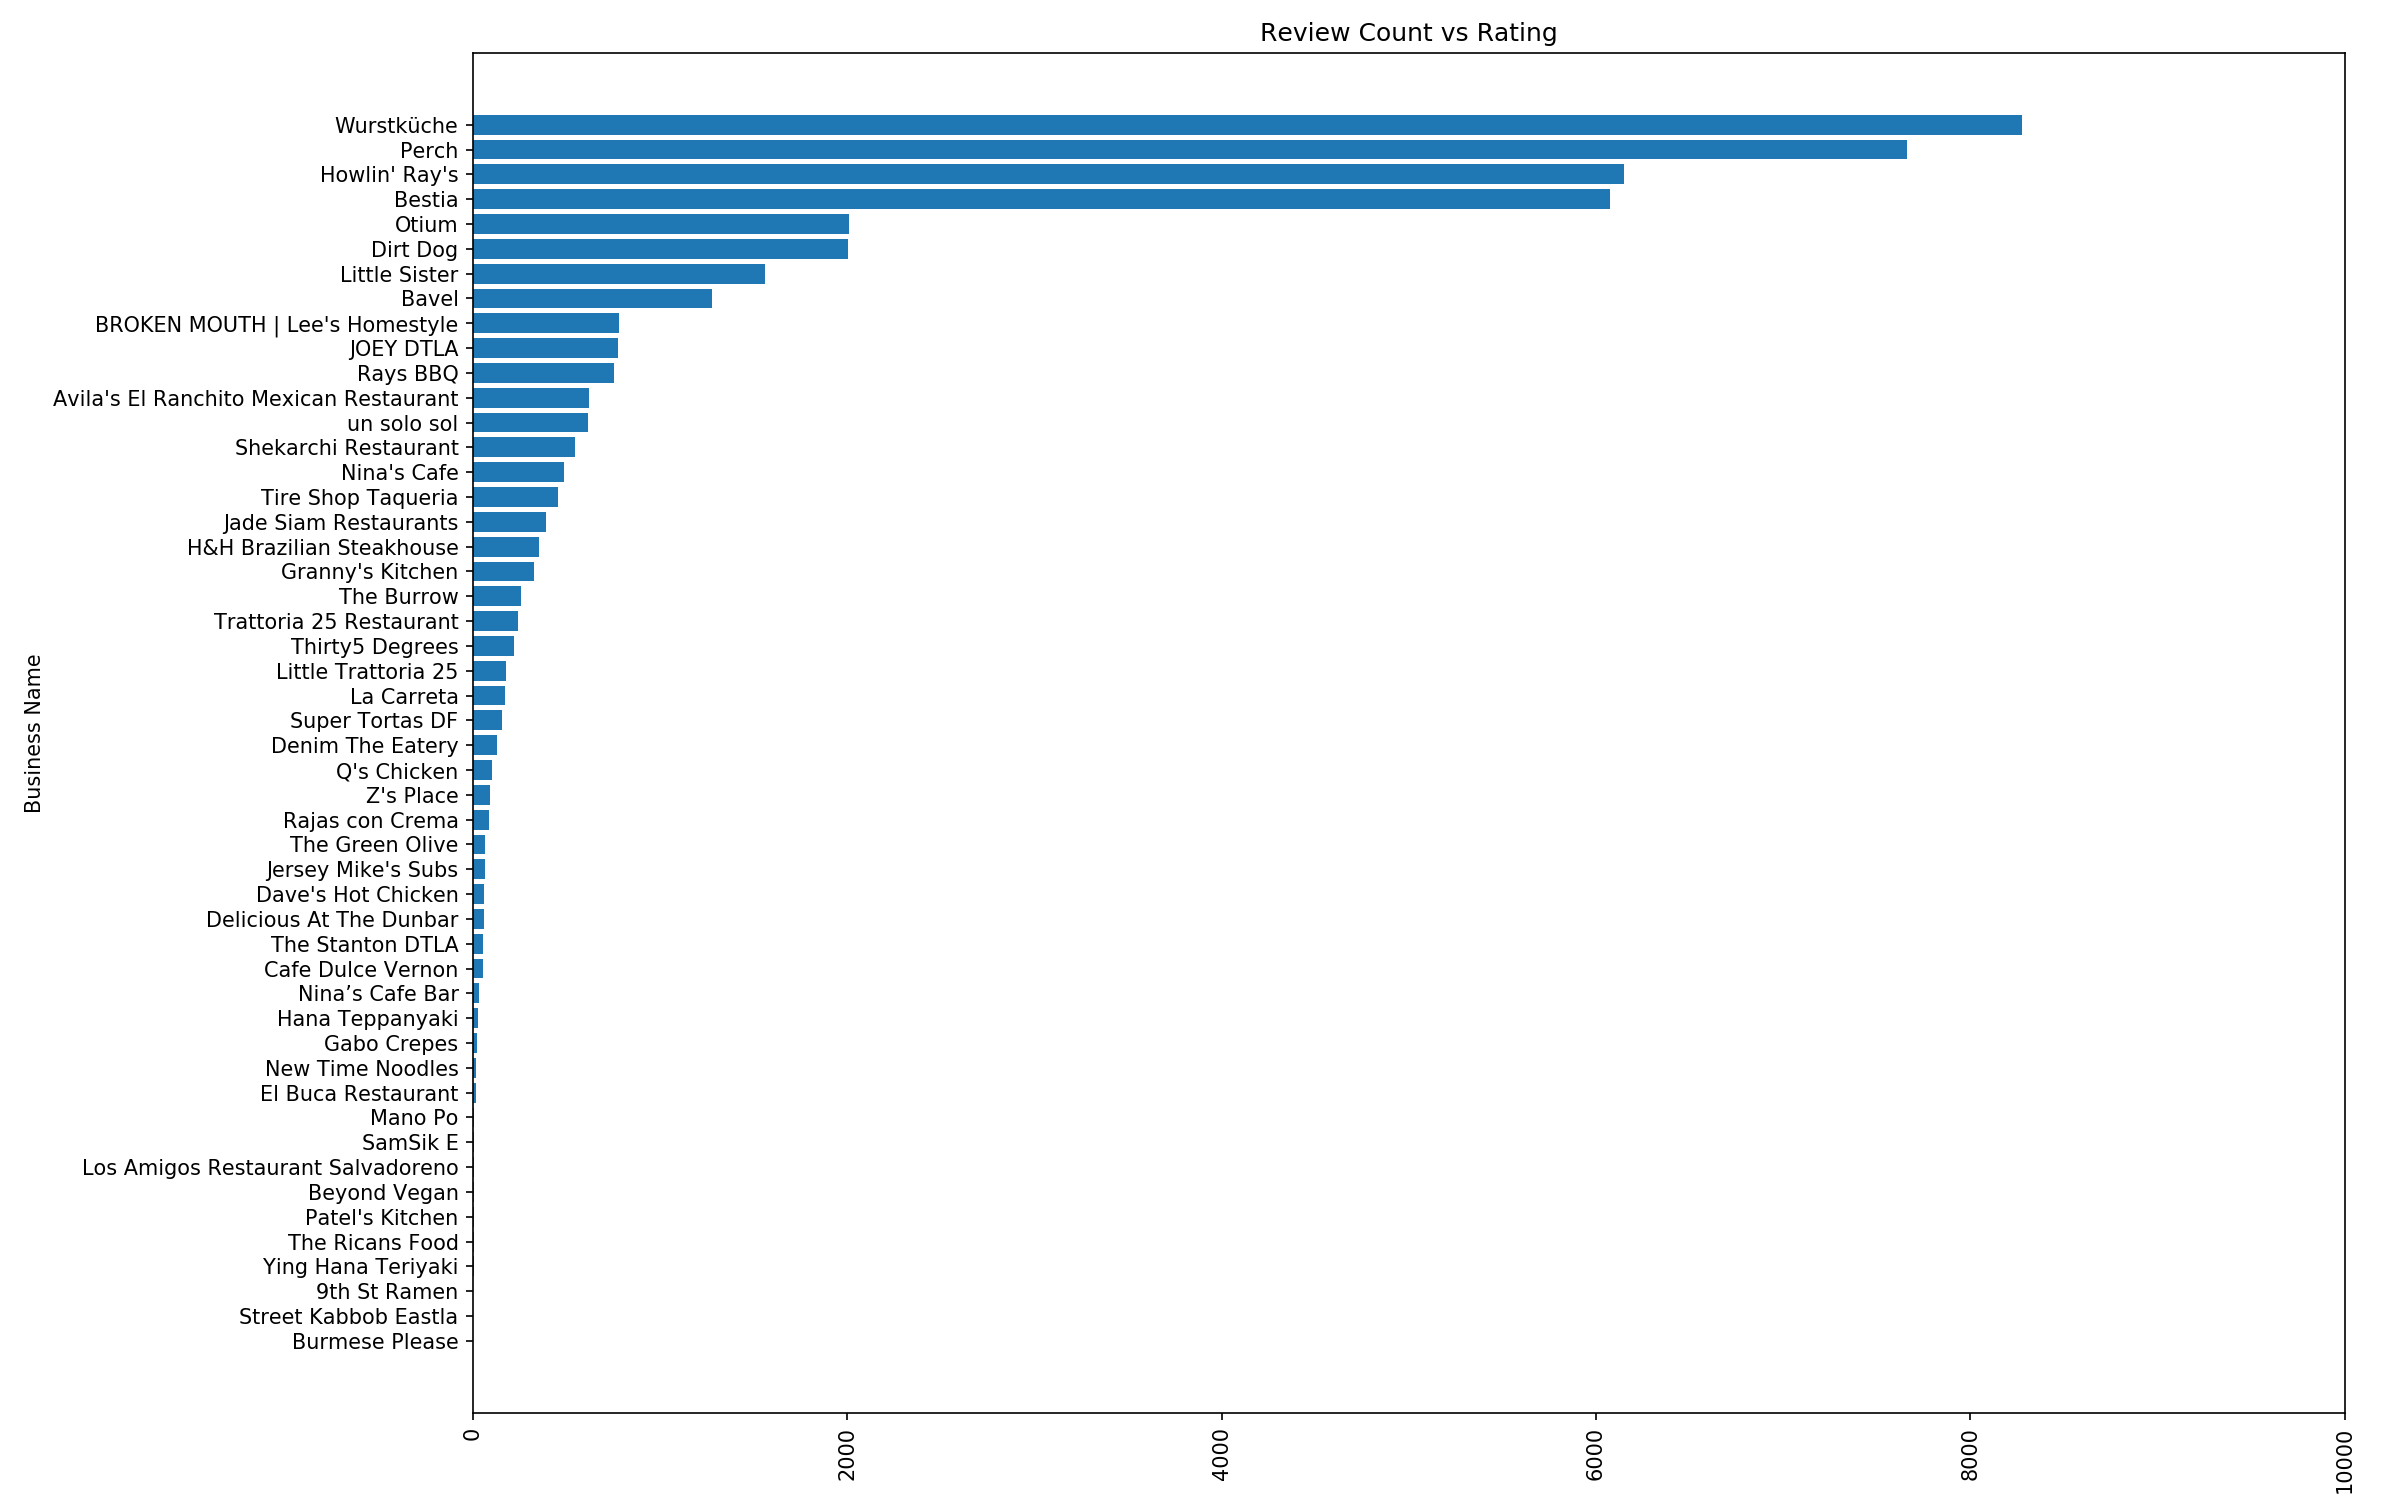

In [35]:
fig, ax = plt.subplots(figsize=(16, 10))

# rating_plot = total_data_df["Rating"]
review_plot = total_data_df_rename_sorted["Review"]
business_name_plot = total_data_df_rename_sorted["Restaurant Name"]

ax.barh(business_name_plot,review_plot)
ax.set_xlabel("Review Count")
ax.set_ylabel("Business Name")

ax.set_xlim(0,10000)

# ax.xaxis.set_tick_params(rotation=90)
ax.set_title("Review Count vs Restaurant Name")

fig.tight_layout()

fig.savefig("../Project 1/Plot_1.png")

<IPython.core.display.Javascript object>


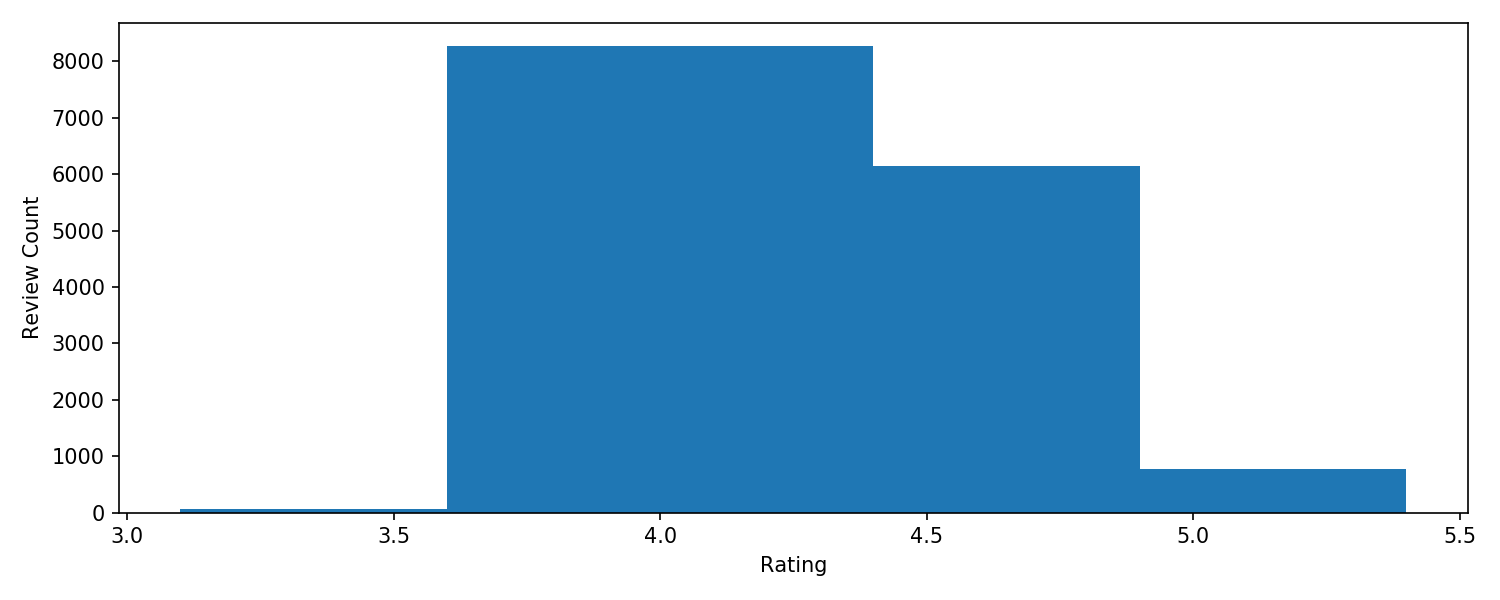

In [37]:
fig, ax2 = plt.subplots(figsize=(10, 4))

rating_plot = total_data_df_rename_sorted["Rating"]
review_plot = total_data_df_rename_sorted["Review"]
business_name_plot = total_data_df_rename_sorted["Restaurant Name"]

ax2.bar(rating_plot,review_plot)
ax2.set_ylabel("Review Count")
ax2.set_xlabel("Rating")


# ax.set_xlim(0,20000)

ax.xaxis.set_tick_params(rotation=90)
ax.set_title("Review Count vs Rating")

fig.tight_layout()

fig.savefig("../Project 1/Plot_2.png")

In [38]:
distance_df_sorted["Price Tag"].value_counts()

$$     22
NaN    15
$       9
$$$     4
Name: Price Tag, dtype: int64

<IPython.core.display.Javascript object>


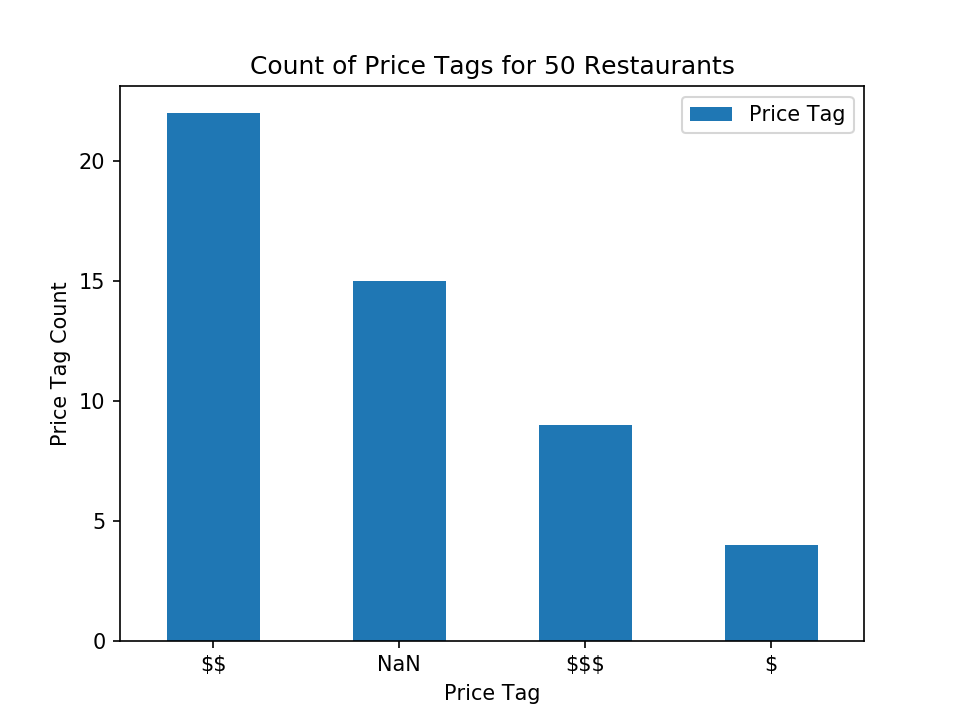

In [39]:
fig, ax = plt.subplots()
fig.canvas.draw()
distance_df_sorted["Price Tag"].value_counts().reset_index().plot(kind='bar', ax=ax);

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = "$\$"
labels[1] = "NaN"
labels[2] = "$\$\$"
labels[3] = "$"
# labels[4] = "$\$\$\$"

ax.set_xlabel("Price Tag")
ax.set_ylabel("Price Tag Count")
ax.set_title("Count of Price Tags for 50 Restaurants")

ax.xaxis.set_tick_params(rotation=0)
ax.set_xticklabels(labels)

fig.savefig("../Project 1/Plot_3.png")
